# de Vaucouleurs Profili

de Vaucouleurs Profili, Fransız-Amerikan astronom Gérard de Vaucouleurs tarafından önerilen ve özellikle **eliptik gökadaların** ışık dağılımını modellemek için kullanılan bir fonksiyondur. Bu profil, $r^(1/4)$ yasası olarak da bilinir.

de Vaucouleurs Profili şu şekilde ifade edilir:

$I(r) = Ie * e^{(-7.67 * ((r/Re)^{(1/4)} - 1))}$

$$\log \left( \dfrac{I_r}{I_{re}} \right) = -3.33 \left[ \left( \dfrac{r}{r_e} \right)^{1/4} - 1 \right]\quad \left[\dfrac{L_{\odot}}{pc}\right]$$

$$\mu(r) = \mu(e) + 8.33 \left[ \left( \dfrac{r}{r_e} \right)^{1/4} -1 \right] \quad \left[ \dfrac{mag}{arcsec^2}\right]$$


Burada:
- $I(r)$, r yarıçapındaki yüzey parlaklığı
- $Ie$, etkin yarıçaptaki (Re) yüzey parlaklığı
- $r$, gökada merkezinden olan uzaklık
- $Re$, etkin yarıçap

Bu profil, birçok eliptik gökadanın ışık dağılımını oldukça iyi bir şekilde tanımlar.

# Sersic Profili

Sersic profil fonksiyonu, galaksilerin ışık yoğunluğunun galaksinin merkezinden uzaklaştıkça nasıl değiştiğini tanımlar. Sersic profili, **hem eliptik galaksilerde hem de sarmal galaksilerin** ışık dağılımında kullanılır. Bu tür profiller, galaksilerin yapısını anlamamıza ve farklı galaksi türlerini karşılaştırmamıza olanak tanır. Özellikle galaksi morfolojisi ve evrim çalışmaları için önemli bir araçtır.

$$\log \left( \dfrac{I(r)}{I(r_e)} \right) = -3.33 \left[ \left( \dfrac{r}{r_e} \right)^{1/n} - 1 \right]\quad \left[\dfrac{L_{\odot}}{pc}\right]$$

$$\mu(r) = \mu(e) + 8.33 \left[ \left( \dfrac{r}{r_e} \right)^{1/n} -1 \right] \quad \left[ \dfrac{mag}{arcsec^2}\right]$$

Sersic fonksiyonunu tanımlamak için temel parametreler kullanılır: 
+ $R_e$ (etkili yarıçap), galaksi parlaklığınının yarısının içinde bulunduğu yarıçapı belirler; 
+ $I_e$, etkili yarıçapta yüzey parlaklığını tanımlar; ve 
+ $n$, Sersic indeksidir. n değeri, profillin şeklini belirler; 
    + **_düşük n_** değerleri (örneğin, n=1) eksponansiyel diskler için uygundur, (exponansiyel disk?)
    + **_yüksek n_** değerleri ise (örneğin, n=4) de Vaucouleurs profiline uyan eliptik galaksileri tanımlar.

## Exponansiyel Disk

 Exponansiyel disk, bir galaktik bulutun veya galaksinin yapısını anlamada kullanılan bir modeldir. Bu model, disk biçimli bir yapıyı temsil eder ve genellikle Sersic türü profillerden biri olarak kabul edilir. Exponansiyel diskler, n değeri 1'e eşit veya çok daha küçük olan bir Sersic tipidir ve yıldızların diskteki dağılımını ifade etmek için kullanılır.

Exponansiyel diskler, n değerine bağlı olarak farklı özelliklere sahiptir:
- **n = 1** (Sersic tipi 1) - Bu durumda, diskin yapısı çok genç ve kümeler halinde dizilmiş yıldızlardan oluşur.
- **n < 1** - Daha düşük n değerleri, galaktik bulutların daha hızlı da yıkılmasına ve genç yıldızların oluşumu için uygundur.
- **n > 1** - Daha yüksek n değerleri, galaktik bulutların daha fazla zaman alarak yıkamalarına ve genç yıldızların oluşumu için uygundur.

Exponansiyel diskler, spiral gökadalarda sıklıkla görülür ve bu tip profiller, galaktik yapıların dinamik ve evrimini anlamada önemli rol oynar.

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d 
import pdb
#from tools import plots


In [6]:
def profile(r, I_e, R_e=1., n=1., mag=False) :
    """
    routine to return Sersic profile

    Args:
        r:  array-like
            input array of radii at which to calculate profile
       I_e: float
            surface brightness at effective radius, in intensity or magnitude
            units, depending on mag
       R_e: float, optional
            effective radius, default=1.
       n:  sersic index (default=1, i.e. exponential)
       mag: bool, optional
            return in mag units if True, default=False
    """

    bn=1.99*n-0.327
    I_r = np.exp (-bn * ((r/R_e)**(1./n) - 1) )           # Sersic function
    if mag :
        return I_e - 2.5 *np.log10(I_r)
    else :
        return I_e * I_r


Bir halkadaki akıyı hesaplamak için bir fonksiyon yazın: 2 $\pi$ r SB(r)

In [7]:
def flux(r, I_e=0., R_e=1., n=1) :
    """ Helper routine to calculate annular flux at given radius for integrator
    """
    return 2*np.pi*r*profile(r,I_e,R_e,n=n)

Bir dizi farklı Sersic indeksinde profilleri hesaplama ve çizme işlevi. İsteğe bağlı olarak kümülatif profili hesaplar ve çizer.

In [8]:
def profiles(r=np.arange(0.,2.,0.01),ns=[0.6,1.0,1.4,2.0,2.6,3.2,4.0],
             I_e=1.,R_e=1.,cumulative=False, mag=True, R_e_max = 1000.) :
    """ Plot profiles of various Sersic indices

        r : arraylike, optional
            radii to calculate profiles at, default=np.arange(0.,5,0.01)
        ns : arraylike, optional
             set of Sersic indices to plot, default=[0.6,1.0,1.4,2.0,2.6,3.2,4.0]
        I_e : float, optional
             SB at effective radius, default=1.
        R_e : float, optional
             Effective radius, default=1.
        cumulative: bool, optional
             if True, plot cumulative profile
    """

    # get sum for n=1 (used only if cumulative=True), using scipy.integrate.quad() routine
    sum1 = quad(flux,0.,R_e_max,args=(I_e,R_e,1))
    plt.figure(figsize=(10, 6))
    # loop over Sersic indices, plotting each profile
    for n in ns :
        if cumulative :
            # integrate to R_e_max for normalizing total
            sum = quad(flux,0.,R_e_max,args=(1.,1.,n))

            # Integrate to each radius, wasteful since we keep integrating over same area!
            cum=[]
            for rr in r :
                cum.append(quad(flux,0.,rr,args=(1.,1.,n))[0]/sum[0])
   
            plt.plot(r,cum,label='n={:4.1f}'.format(n))
            print(n,sum[0]/sum1[0])
        else :
            plt.plot(r,profile(r,I_e,R_e,n=n,mag=mag),label='n={:4.1f}'.format(n))


    # annotate plot
    plt.legend()
    plt.xlabel('Radius (r/R_e)')
    if cumulative :
        plt.ylabel('Cumulative flux')
    else :
       
        # invert axes if magnitude units
        if mag: 
            plt.ylabel('Surface brightness (mag)')
            plt.ylim(plt.ylim()[::-1])
        else :
            plt.ylabel('Surface brightness')
    plt.savefig('sersic_profile.png', bbox_inches='tight')
    plt.show()

**Kümülatif Olmayan Görselleştirme:** Bu tür görselleştirmede, farklı Sersic indekslerine (n) sahip profillerin yüzey parlaklıklarının radyal(yarıçapa göre) dağılımlarını doğrudan gözlemleriz. **Bu grafikler, galaksinin merkezinden uzaklaştıkça yüzey parlaklığının nasıl değiştiğini gösterir**. Her bir n değeri için farklı bir profil elde ederiz. Örneğin, n=1 değeri eksponansiyel bir diski temsil ederken, n=4 değeri de Vaucouleurs profiline uyan eliptik bir galaksiyi temsil eder. Bu grafikler, galaksi türleri arasındaki farkları belirgin bir şekilde görmemizi sağlar.

**Kümülatif Görselleştirme:** Bu tür görselleştirmede ise, belirli bir yarıçapa kadar olan toplam ışık miktarını (akışı) gözlemleriz. **Bu grafik, galaksinin farklı yarıçaplarda nasıl birikimli olarak ışık yayıldığını gösterir.** Her bir yarıçap için, bu yarıçapa kadar olan toplam ışığı hesaplayarak birikimli bir profil oluştururuz. Kümülatif grafikler, galaksinin genel ışık dağılımını ve merkezdeki yoğunlaşmayı daha iyi anlamamızı sağlar. Ayrıca, farklı n değerlerine sahip profiller arasındaki toplam ışık dağılım farklarını belirginleştirir.

```
Kısacası:

Kümülatif olmayan görselleştirme, yüzey parlaklığının radyal dağılımını ve galaksinin yapısal özelliklerini belirgin bir şekilde ortaya koyar.-Galaksi türü

Kümülatif görselleştirme ise, galaksinin genel ışık dağılımını ve farklı yarıçaplardaki toplam ışık miktarını analiz etmemizi sağlar.-Galaksi yıldız oluşum oranı olabilir mi?
```

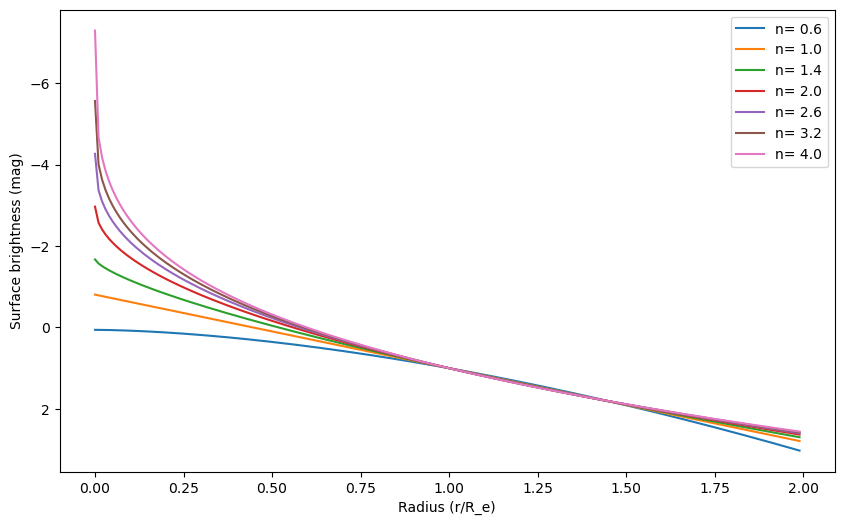

In [9]:
profiles()

n=0.6 çizgisinden başlayalım x eksenide magnitude parlaklık kadir var, y ekseninde yarıçapın/ etkin yarıçapa oranı var peki bu ne demek yani neyi ölçüyorum, neye bakıyorum? şöyle düşünüyorum merkezden ölçüyorum yarıçapı, etkin yarıçapı da öyle birbirine böldüğümde r- yarıçap değerini artırıyorum etkin yarçap sabit 1, yani aslında yarıçapa bağlı olarak parlaklığı inceliyorum. 0 galaksinin merkezinden 5 galaksinin ucuna sınırına kadar diyelim (parlaklık sınırı - karanlık madde halo filan girir içine sonra sınır dedik olmaz)

Aslında x eksenini Merkez bölgesi, Etkin yarıçap bölgesi ve Holmberg yarıçapı bölgesi olarak üç bölgeye ayıramaz mıyım? 



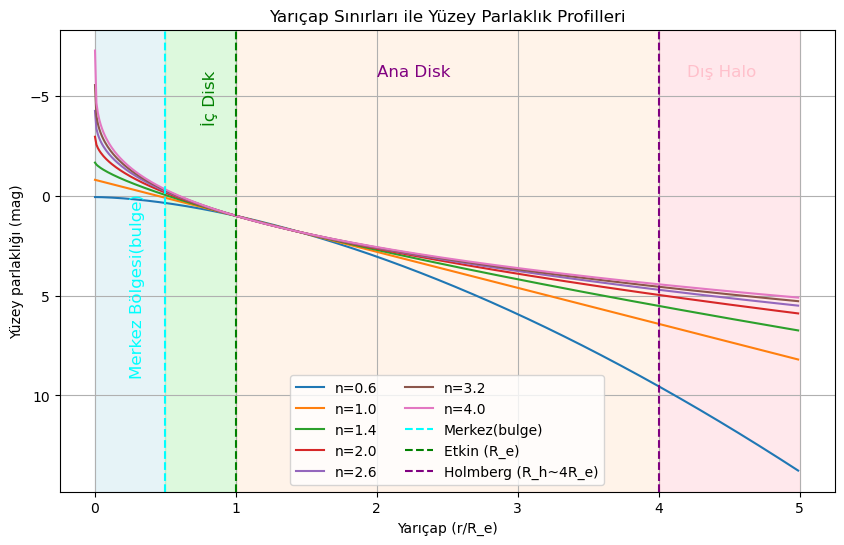

In [16]:
# Sınıflandırmalar ile profilleri çiz
def profiller_sınırlı(r=np.arange(0., 5., 0.01), ns=[0.6, 1.0, 1.4, 2.0, 2.6, 3.2, 4.0], I_e=1., R_e=1., mag=True):
    plt.figure(figsize=(10, 6))
    # Her Sersic endeksini döngü ile çiz
    for n in ns:
        plt.plot(r, profile(r, I_e, R_e, n=n, mag=mag), label=f'n={n:.1f}')
    # Sınırlar için dikey çizgiler ekle
    plt.axvline(x=0.5, color='cyan', linestyle='--', linewidth=1.5, label='Merkez(bulge)')
    plt.axvline(x=1.0, color='green', linestyle='--', linewidth=1.5, label='Etkin (R_e)')
    plt.axvline(x=4.0, color='purple', linestyle='--', linewidth=1.5, label='Holmberg (R_h~4R_e)')
    
    # Gölgeli alanlar
    plt.axvspan(0, 0.5, color='lightblue', alpha=0.3)
    plt.axvspan(0.5, 1.0, color='lightgreen', alpha=0.3)
    plt.axvspan(1.0, 4.0, color='peachpuff', alpha=0.3)
    plt.axvspan(4.0, 5.0, color='lightpink', alpha=0.3)
    
    # İlgili alanlara dikey etiketler ekle
    plt.text(0.25, plt.ylim()[0] + 15 + (plt.ylim()[1] - plt.ylim()[0]) * 0.1, 'Merkez Bölgesi(bulge)', color='cyan', fontsize=12, rotation=90)
    plt.text(0.75, plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.2, 'İç Disk', color='green', fontsize=12, rotation=90)
    plt.text(2.0, plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.1, 'Ana Disk', color='purple', fontsize=12)
    plt.text(4.2, plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.1, 'Dış Halo', color='pink', fontsize=12)
    
    # Grafiği etiketle ve göster
    plt.xlabel('Yarıçap (r/R_e)')
    plt.ylabel('Yüzey parlaklığı (mag)' if mag else 'Yüzey parlaklığı')
    plt.ylim(plt.ylim()[::-1] if mag else plt.ylim())  # Kadir birimlerinde ekseni ters çevir
    plt.title('Yarıçap Sınırları ile Yüzey Parlaklık Profilleri')
    plt.legend(loc="best",ncol=2)
    plt.grid()
    plt.show()

# Çizim fonksiyonunu çalıştır
profiller_sınırlı()


Galaksi türleri arasında genel olarak uygulanabilen bir standart re ve Holmberg yarıçapı belirleyici parametreleri bulunmamaktadır. Bu nedenle, sarmal galaksiler gibi özel bir türe göre model oluşturmak daha anlamlı olabilir. Belirli bir galaksi türü için (örneğin, n=1 olan sarmal galaksiler) bu parametreleri belirlemek ve diğer galaksi türleriyle karşılaştırmak yararlı olabilir mi?


Sersic indeksi \( n \) değerlerine göre Hubble galaksi şeması ile ilişki kurarak, bu grafik üzerindeki her \( n \) değerine karşılık gelen galaksi türlerini birlikte düşünürsek:

1. **\( n = 0.6 \)**: Bu değer, tipik olarak daha düzensiz ve diskli yapılarla ilişkilendirilir. Yani, düzensiz galaksiler (Irr) ve düşük parlaklık yüzeyli sarmal galaksiler bu kategoriye girebilir. Bu tür galaksilerde ışık merkezi yoğunluklu değildir ve yüzey parlaklığı daha hızlı bir şekilde azalır.

2. **\( n = 1.0 \)**: Bu değer, genellikle exponential disk profiliyle uyumlu olan sarmal galaksilerin disk bileşenlerine karşılık gelir. Bu tür sarmal galaksiler, düzenli bir disk yapısına sahiptir ve yüzey parlaklığı merkezi bölgelerden dış bölgelere doğru düzenli olarak azalır.

3. **\( n = 1.4 \)**: Hafif şişkinliğe sahip erken tip sarmal galaksiler (örneğin Sa türü) bu değere karşılık gelebilir. Bu galaksilerde, diske ek olarak merkezde belirgin bir şişkinlik bulunmaktadır.

4. **\( n = 2.0 \)**: Erken tip sarmal galaksilerin daha belirgin şişkinlikleri olan türleri (Sa-S0) için uygundur. Şişkinlik, galaksinin merkezi bölgelerindeki ışık dağılımını artırarak, Sersic indeksini yükseltir.

5. **\( n = 2.6 \)**: Bu değer, S0 (merceksi) galaksiler gibi, belirgin bir şişkinliği olan ancak sarmal yapının baskın olmadığı galaksilere işaret eder. Bu galaksiler, genellikle birleşme süreçlerinin bir sonucu olarak düzleşmiş disk yapıları ve belirgin şişkinlikler sergiler.

6. **\( n = 3.2 \)** ve **\( n = 4.0 \)**: Bu değerler, klasik eliptik galaksiler (E) için geçerlidir. Yüksek \( n \) değerleri, eliptik galaksilerin ışık dağılımının merkezi yoğunluklu ve dış bölgelere doğru daha yavaş bir azalış gösterdiğini ifade eder. Özellikle \( n = 4 \) (de Vaucouleurs profili), tipik olarak parlak eliptik galaksiler için kullanılan bir modeldir.

Özetle, Hubble şemasında düşük \( n \) değerleri sarmal ve düzensiz galaksilere karşılık gelirken, yüksek \( n \) değerleri ise eliptik galaksilere işaret eder. Bu ilişki, galaksi türlerinin ışık dağılımı ve yapısal özelliklerine göre farklı evrimsel yollar izleyebileceğini gösterir.

Kim okuyacak bu kadar uzun yazıyı diyenler olabilir ki bende bunlardan biriyim aşağıda tablo halinde yazalım:

| Sersic İndeksi (n) | Galaksi Türü                       | Açıklama                                                        |
|--------------------|------------------------------------|-----------------------------------------------------------------|
| n = 0.6             | Düzensiz Galaksiler (Irr)         | Merkezi yoğunluk düşük, yüzey parlaklığı hızla azalır.           |
| n = 1.0             | Sarmal Galaksi (Disk)             | Exponential disk profili, tipik sarmal galaksi diski.           |
| n = 1.4             | Erken Tip Sarmal (Sa)             | Hafif şişkinliğe sahip erken tip sarmal galaksi.                |
| n = 2.0             | Erken Tip Sarmal (Sa-S0)          | Daha belirgin şişkinlik ve daha düzenli bir yapı.               |
| n = 2.6             | Merceksi Galaksi (S0)             | Belirgin şişkinlik, sarmal yapıdan çok düzleşmiş disk yapısı.   |
| n = 3.2             | Eliptik Galaksi (E)               | Merkezi yoğunluklu ve dış bölgelere doğru yavaşça azalan ışık.  |
| n = 4.0             | Parlak Eliptik Galaksi (E)        | de Vaucouleurs profili, klasik parlak eliptik galaksi modeli.   |


Yukarıdaki gibi bir tablo oluşturduk ama bu gerçekten böyle olabilir mi? Tablonun gerçekliğini ya da n parametreleriyle galaksi türleri arasında böyle bir ilişkinin varlığını gözlemsel olarak nasıl tespit edebiliriz? Böyle bir ilişki olabliir mi? olmaya bilir mi?

TOPCAD kullanarak belirlediğimiz galaksi türlerine ait Sersic profili için r yarıçaplarını, re etkin yarıçaplarını ve n sersic endeksini kullanarak galaksi türleri ve n parametreleri arasındaki ilişkiyi inceleyebiliriz.(TOPCAD'de böyle bir sorgulama nasıl yaparız? ya da yapabilir miyiz?) Bu şekilde, teorik olarak beklenen bir ilişkinin varlığını gözlemsel verilere dayanarak test edebiliriz.

Yukarıda ürettiğimiz grafiğe benzer bir grafik olarak https://ned.ipac.caltech.edu/level5/March12/Gadotti/Gadotti4.html bu adresten 11. grafiğe bakarak

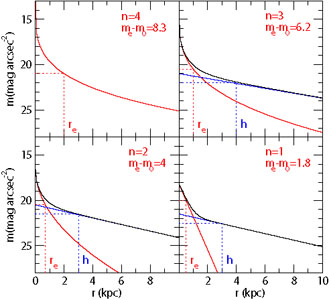

Şekil 11. Sol üst: eliptik bir galaksinin ışık profilini temsil edebilecek n = 4'lü bir Sérsic fonksiyonu. Sağ üst: n = 3 olan bir Sérsic fonksiyonu - erken Hubble tipi bir galaksideki şişkinliği temsil edebilir - artı böyle bir galaksinin diskini temsil eden üstel bir fonksiyon. Sol alt: ikincisi ile aynı ancak n = 2 ile bir Sérsic; ve son olarak, sağ alt: ikincisi ile aynı ancak n = 1 ile. Bu geçerli olduğunda her iki bileşenin toplamı gösterilir. Ayrıca, her model için şişkinlik etkin ve merkezi yüzey parlaklığı arasındaki fark, µe - µ0 (bunun bir PSF'den kaynaklanan etkileri dikkate almadığına dikkat edin) ve re ve disk ölçeği uzunluğu h'nin konumları da gösterilmiştir.

0.6 0.8157121442130806
1.0 1.0
1.4 1.15847917856495
2.0 1.3633679318599583
2.6 1.5417624837887856
3.2 1.7017531846552076
4.0 1.894309704352981


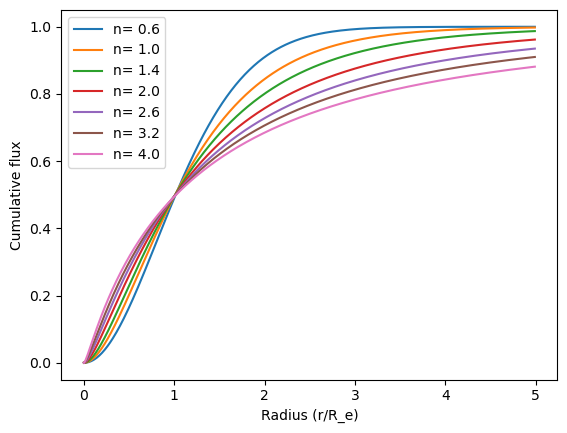

In [17]:
profiles(cumulative=True)

Kümülatif akı grafiği, galaksilerin ışık dağılımının radyal olarak nasıl toplandığını gösterir. Bu grafik, toplam parlaklığının yarısının veya daha fazlasının hangi yarıçapta biriktiğini ve parlaklığının galaksi içinde ne kadar hızla arttığını anlamamıza olanak tanır.

Grafiğin şu şekilde yorumlayabiliriz:

1. **Düşük \( n \) Değerleri (0.6-1.0)**:
   - Düşük Sersic indeksine sahip profillerde (örn. \( n = 0.6 \), \( n = 1.0 \)), kümülatif akı daha hızlı bir şekilde yükselir. Bu, galaksinin merkezde daha az konsantre olduğu ve parlaklığının büyük bir kısmının dış bölgelere yayıldığı anlamına gelir. Bu tür profiller, düzensiz veya diskli galaksilerin karakteristik özelliğidir.
   
2. **Orta \( n \) Değerleri (1.4-2.6)**:
   - Bu aralıkta, parlaklığının artış hızı daha orta seviyededir. Galaksinin merkezine doğru belirgin bir yoğunluk artışı vardır, ancak parlaklık hala önemli bir şekilde dış bölgelere de dağılmıştır. Bu durum, erken tip sarmal (Sa) ve merceksi (S0) galaksiler için olağandır.
   
3. **Yüksek \( n \) Değerleri (3.2-4.0)**:
   - Yüksek Sersic indeksine sahip profillerde (örn. \( n = 3.2 \), \( n = 4.0 \)), kümülatif akı daha yavaş artar. Bu, galaksinin merkezde çok daha yoğun ve konsantre olduğunu gösterir. Eliptik galaksilerde, parlaklığının büyük kısmı merkezde toplanır ve dış bölgelerdeki parlaklık daha düşük olur.

Özetleyecek olursak bu kümülatif akı grafiği, galaksinin ışık yoğunluğunun merkezden dışa doğru nasıl değiştiğini ve galaksinin morfolojik yapısını (örneğin, düzensiz, diskli veya eliptik) anlamada kullanılan önemli bir göstergedir. Düşük \( n \) değerleri daha yayılmış bir yapı, yüksek \( n \) değerleri ise daha merkezde yoğunlaşmış bir yapı gösterir.

### Derste verilen denkleme göre Sersic profili oluşturma

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_10860/1952513311.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu(r)$ [mag/arcsec²]')


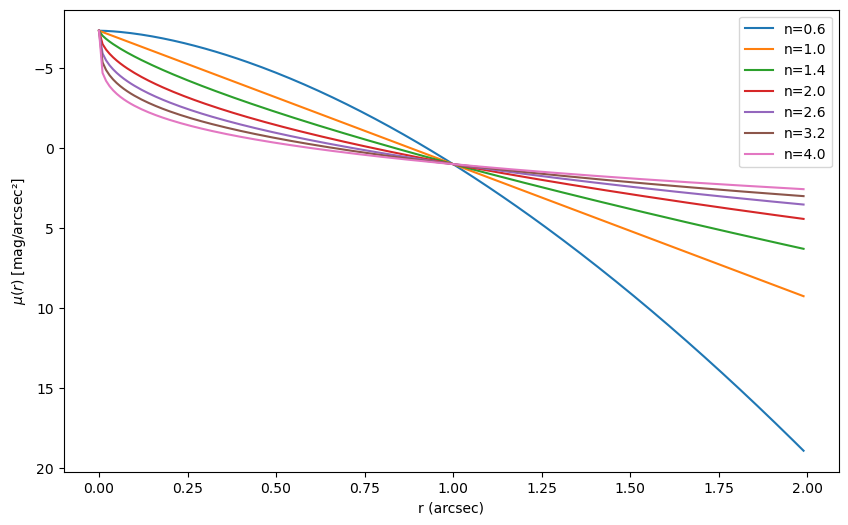

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sersic fonksiyonu tanımlama
def sersic_mu(r, n, mu_e):
    return mu_e + 8.33 * ((r / r_e)**(1/n) - 1)

# Değişkenlerin tanımlanması
r = np.arange(0., 2., 0.01)
n_values = [0.6, 1.0, 1.4, 2.0, 2.6, 3.2, 4.0]
mu_e = 1
r_e = 1  # r_e değeri sabit olarak alınabilir veya kullanıcıdan alınabilir

# Grafik oluşturma
plt.figure(figsize=(10, 6))

for n in n_values:
    mu = sersic_mu(r, n, mu_e)
    plt.plot(r, mu, label=f'n={n}')


# Y eksenini ters çevirme parlaklık ters ilişkisi
plt.gca().invert_yaxis()

plt.xlabel('r (arcsec)')
plt.ylabel('$\mu(r)$ [mag/arcsec²]')
#plt.title(r'Sersic Fonksiyonu $\mu(r) = \mu_e + 8.33 \left[ \left( \dfrac{r}{r_e} \right)^{1/n} -1 \right]$')
plt.legend()
#plt.grid(True)
plt.savefig('sersic_profile1.png', bbox_inches='tight')
plt.show()

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_35020/1000604187.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu(r)$ [mag/arcsec²]')


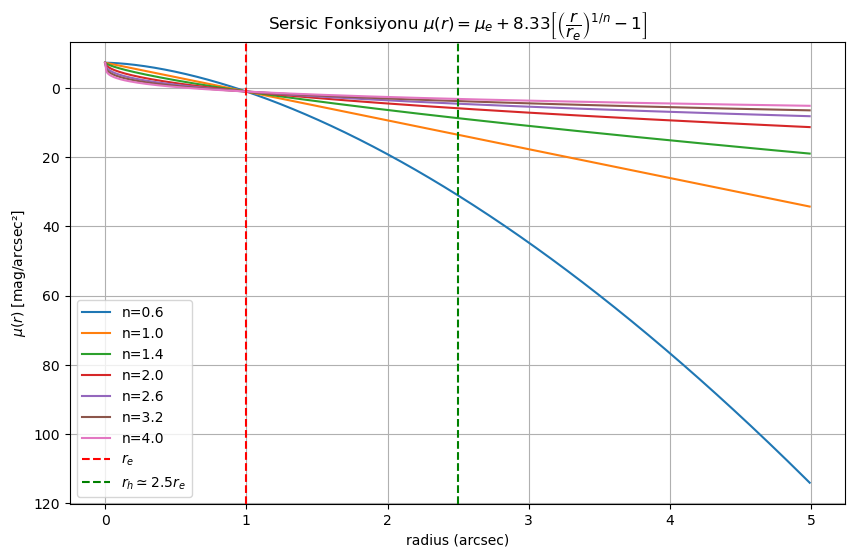

In [9]:
r_e = 1  # r_e değeri sabit olarak alınabilir veya kullanıcıdan alınabilir
re = 1  # Etkin yarıçap, burada sabit olarak belirlendi
rh = 2.5 * re  # Holmberg yarıçapı, etkin yarıçaptan 2.5 kat daha büyük kabul edilir

# Grafik oluşturma
plt.figure(figsize=(10, 6))

for n in n_values:
    mu = sersic_mu(r, n, mu_e)
    plt.plot(r, mu, label=f'n={n}')

# Dikey çizgiler eklemek için re ve rh değerlerini kullanıyoruz
plt.axvline(x=re, color='red', linestyle='--', label=r'$r_e$')
plt.axvline(x=rh, color='green', linestyle='--', label=r'$r_{h}\simeq 2.5 r_e$')

# Y eksenini ters çevirme parlaklık ters ilişkisi
plt.gca().invert_yaxis()

plt.xlabel('radius (arcsec)')
plt.ylabel('$\mu(r)$ [mag/arcsec²]')
plt.title(r'Sersic Fonksiyonu $\mu(r) = \mu_e + 8.33 \left[ \left( \dfrac{r}{r_e} \right)^{1/n} -1 \right]$')
plt.legend()
plt.grid(True)
plt.show()


`straatman` fonksiyonu, belirli `R_e` ve `n` değerleri için Sersic profillerini çizer ve bu profilleri belirli bir yarıçapta normalize eder. Bu normalize edilmiş profiller, farklı galaksi türlerinin yüzey parlaklık profillerini karşılaştırmamıza olanak tanır. Fonksiyon, aynı zamanda, bu profilleri belirli bir yarıçapta normalize ederek, çeşitli galaksi türleri arasındaki farkları daha belirgin hale getirir.

<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_9054/1531392851.py:22: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel(f'$\mu$')


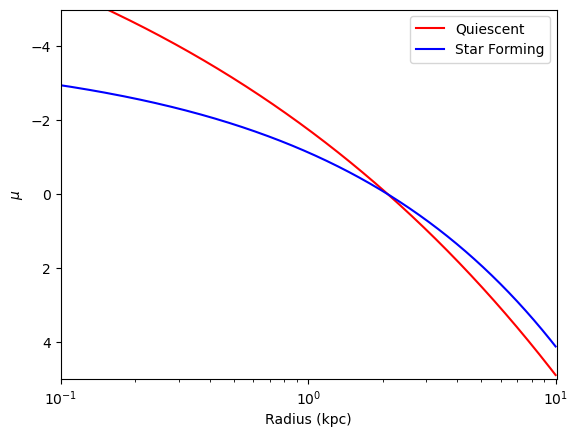

In [15]:

def straatman(R_es=[0.85, 2.62], ns=[4.14, 2.17], labels=['Quiescent', 'Star Forming'], colors=['red', 'blue'], rnorm=2.1):
    """
    Plot multiple Sersic profiles, normalized at some radius
    """
    r = np.arange(0., 10., 0.01)
    fig, ax = plt.subplots(1, 1)
    
    for R_e, n, label, color in zip(R_es, ns, labels, colors):
        prof = profile(r, I_e=1, R_e=R_e, n=n, mag=True)
        
        # construct an interpolating function
        interp = interp1d(r, prof)
        
        # interpolate at normalizing radius and plot
        norm = interp(rnorm)
        ax.plot(r, prof - norm, label=label, color=color)
        
    ax.set_xlim([0.1, 10.1])
    ax.set_ylim([5, -5])
    ax.set_xscale('log')
    ax.set_xlabel('Radius (kpc)')
    ax.set_ylabel(f'$\mu$')
    ax.legend()
    plt.show()

straatman()


Boris Petrosian, Ermeni kökenli bir Amerikalı astrofizikçidir ve Petrosian yarıçapı kavramını tanımlayan kişidir. Onun çalışmaları, galaksilerin ve diğer gök cisimlerinin fotometrik analizini geliştirmiştir. Petrosian yarıçapı özellikle önemli bir ölçüm aracıdır çünkü gözlemsel hatalara karşı oldukça dayanıklıdır ve farklı galaksiler arasındaki karşılaştırmalarda tutarlılığı sağlar. 

In [21]:
def petro(R_e=1, n=1, eta=0.2, plot=False):
    """
    Calculate Petrosian radius for Sersic profile with index n
    I_e : float, optional
         SB at effective radius, default=1.
    n : float, optional
         Sersic index,  default=1.
    eta : float, optional
         Critical value of Petrosian ratio to determine Petrosian radius
    """
    r = np.arange(0., 10. * R_e, 0.01)
    ratio = []
    I_e = 1  # note Petrosian ratio independent of I_e!
    for rr in r:
        # integrate flux internal to rr
        tot = quad(flux, 0., rr, args=(I_e, R_e, n))[0]
        # Petrosian ratio = SB / average_internal_flux
        ratio.append(profile(rr, I_e, R_e, n=n) / (tot / (np.pi * rr ** 2)))
    
    # interpolate to desired ratio, eta
    interp = interp1d(ratio, r)
    petrorad = interp(eta)
    
    if plot:
        fig, ax = plt.subplots(1, 1)
        ax.plot(r, ratio, label='Petrosian Ratio')
        ax.axvline(x=petrorad, color='r', linestyle='--', label='Petrosian Radius')
        ax.set_xlabel('Radius')
        ax.set_ylabel('Petrosian Ratio')
        ax.grid()
        ax.set_title('R_e: {:.2f}   n: {:.2f}   R_petro : {:.2f}'.format(R_e, n, petrorad))
        ax.legend()
        plt.show()
    
    return petrorad

Calculate Petrosian radius for Straatman et al quiescent and star forming stack model parameters

/tmp/ipykernel_9054/787910145.py:18: RuntimeWarning: invalid value encountered in scalar divide
  ratio.append(profile(rr, I_e, R_e, n=n) / (tot / (np.pi * rr ** 2)))


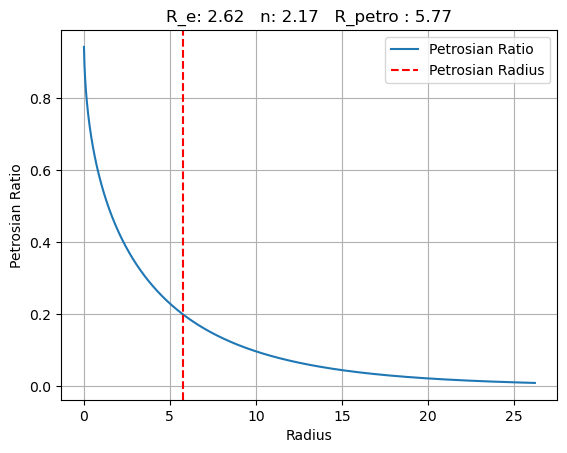

star forming: R_p = 5.77


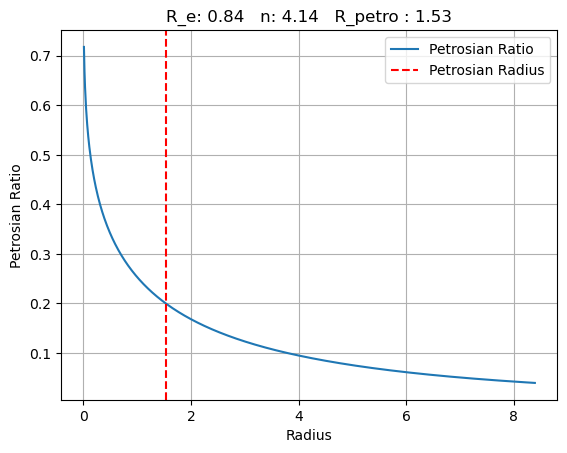

quiescent: R_p = 1.53


In [22]:
print('star forming: R_p = {:.2f}'.format(petro(R_e=2.62,n=2.17,plot=True)))
print('quiescent: R_p = {:.2f}'.format(petro(R_e=0.84,n=4.14,plot=True)))

İleri seviye Modeller 

https://github.com/Autostronomy/AstroPhot/blob/main/docs/source/tutorials/ModelZoo.ipynb

Gerçek bir galaksi üzerinde sersic profilinin uygulanmasını içeren bir döküman

https://astrophot.readthedocs.io/en/latest/tutorials/GettingStarted.html

Bir video An automated non-parametric light profile pipeline for modern galaxy surveys

https://www.youtube.com/watch?v=OFtVYRGrqrY&t=519s





# Kaynak 
+ Bu jupyter dosyası `Professor Jon Holtzman'nın` `2022 Fall - ASTR-555-M01-GALAXIES I` dersineden yararlınalarak hazırlanmıştır ve kullanılan kaynaklar için kendisine teşekkürler. http://astronomy.nmsu.edu/holtz/a555/
+ Bazı yorumlar için `Dr. Öğr. Üyesi Dr. Nutren Filiz Ak` hocamın `2024 Güz- AST305 Galaksiler ve Kozmoloji` ders notlarından faydalanılmıştır kaynaklar için kendisine teşekkür ederiz.
---
+ This jupyter file was created with the help of Professor Jon Holtzman's course `2022 Fall - ASTR-555-M01-GALAXIES I` and we thank him for the references used. http://astronomy.nmsu.edu/holtz/a555/
+ For some comments, the lecture notes of `Dr. Nutren Filiz Ak`s `2024 Fall- AST305 Galaxies and Cosmology` lecture notes were used for some comments. Thanks to her for the sources.
+ GALAXY BULGES AND ELLIPTICAL GALAXIES - LECTURE NOTES -- Dimitri A. Gadotti 
https://ned.ipac.caltech.edu/level5/March12/Gadotti/Gadotti_contents.html